In [1]:
# UNIX
! rm net_names.txt
! ls database >> net_names.txt

In [430]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn

In [2]:
# NOTES
# The input file 'Fanconi anemia and checkpoint recovery.txt'
# was fixed manually, because the node 'DSB' is not formatted in a uniform way.

In [3]:
file = open('net_names.txt')
net_names = [name.rstrip() for name in file]

In [729]:
# here I'm selecting the network

network = 'database/'+net_names[45]

file = open(network)
file_content = [line.rstrip() for line in file]

In [730]:
clean_file = [line for line in file_content if line[0]=='#']
node_names = clean_file[0][3:].split(' ')
input_nodes = [line[2:] for line in clean_file[1:]]
n = len(node_names)

n

25

In [731]:
node_names

['AKT',
 'BAX',
 'cJUN',
 'cRAF',
 'CyclinB1',
 'CyclinD1',
 'ERBB1',
 'ERBB2',
 'ERBB3',
 'ERK1_2',
 'FoxO1_3a',
 'GSKa_b',
 'Nfkb',
 'p38',
 'p53',
 'p70S6K',
 'PRAS',
 'PTEN',
 'RB',
 'RPS6',
 'TSC2',
 'pertuzumab',
 'stimulus',
 'erlotinib',
 'trastuzumab']

In [732]:
sorted_node_names = list(sorted(node_names, key = len, reverse = True))

We are sorting the node names according to their length, and in reverse order, 
because some names might be included in other names (e.g. IL2 in IL21).
By replacing IL2 with a number, e.g. 5,  we would turn IL21 into 21

In [733]:
input_nodes

['AKT (AKT, CyclinB1, ERBB1, ERBB2, ERBB3, PTEN, stimulus, AKT)',
 'BAX (BAX, ERBB1, BAX)',
 'cJUN (GSKa_b, cJUN, cJUN)',
 'cRAF (ERBB1, ERBB2, ERK1_2, RPS6, cRAF, p53, cRAF)',
 'CyclinB1 (CyclinB1, p53, p70S6K, CyclinB1)',
 'CyclinD1 (AKT, CyclinD1, ERK1_2, GSKa_b, PTEN, cJUN, CyclinD1)',
 'ERBB1 (ERBB1, erlotinib, pertuzumab, stimulus, ERBB1)',
 'ERBB2 (BAX, ERBB2, erlotinib, pertuzumab, stimulus, trastuzumab, ERBB2)',
 'ERBB3 (AKT, ERBB3, erlotinib, pertuzumab, stimulus, ERBB3)',
 'ERK1_2 (CyclinB1, ERBB1, ERK1_2, cRAF, ERK1_2)',
 'FoxO1_3a (AKT, FoxO1_3a, FoxO1_3a)',
 'GSKa_b (GSKa_b, p53, GSKa_b)',
 'Nfkb (ERBB3, Nfkb, RPS6, Nfkb)',
 'p38 (AKT, p38, p38)',
 'p53 (CyclinB1, PTEN, RB, p53, p53)',
 'p70S6K (ERBB2, ERK1_2, PRAS, TSC2, p70S6K, p70S6K)',
 'PRAS (AKT, ERBB3, PRAS, PRAS)',
 'PTEN (GSKa_b, PTEN, p70S6K, PTEN)',
 'RB (CyclinD1, ERBB2, RB, TSC2, p53, RB)',
 'RPS6 (RPS6, p70S6K, RPS6)',
 'TSC2 (AKT, ERBB2, ERK1_2, GSKa_b, TSC2, TSC2)']

In [734]:
input_nodes_labels = []

for line in input_nodes:
    for i in range(n):
        line = line.replace(sorted_node_names[i],str(i))
    input_nodes_labels.append(line)

In [735]:
input_nodes_labels

['20 (20, 3, 10, 11, 12, 17, 6, 20)',
 '21 (21, 10, 21)',
 '13 (8, 13, 13)',
 '14 (10, 11, 7, 18, 14, 23, 14)',
 '3 (3, 23, 9, 3)',
 '4 (20, 4, 7, 8, 17, 13, 4)',
 '10 (10, 2, 1, 6, 10)',
 '11 (21, 11, 2, 1, 6, 0, 11)',
 '12 (20, 12, 2, 1, 6, 12)',
 '7 (3, 10, 7, 14, 7)',
 '5 (20, 5, 5)',
 '8 (8, 23, 8)',
 '15 (12, 15, 18, 15)',
 '22 (20, 22, 22)',
 '23 (3, 17, 24, 23, 23)',
 '9 (11, 7, 16, 19, 9, 9)',
 '16 (20, 12, 16, 16)',
 '17 (8, 17, 9, 17)',
 '24 (4, 11, 24, 19, 23, 24)',
 '18 (18, 9, 18)',
 '19 (20, 11, 7, 8, 19, 19)']

In [736]:
edge_list = []

for line in input_nodes_labels:
    formatted_line =  line.replace(' ','').replace(')','').split('(')
    output = formatted_line[0]
    inputs = formatted_line[1].split(',')
    for i in inputs:
        if i != output: # I'm removing self-loops, as the motif code doesn't account for them
            edge_list.append([i,output,'directed',1])
#print(edge_list)

In [737]:
import networkx as nx
import pandas as pd
import pyvis
from pyvis.network import Network

# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259

In [738]:
df = pd.DataFrame(edge_list,columns=['Source','Target','Type','weight'])
df[:3]

,Source,Target,Type,weight
0,3,20,directed,1
1,10,20,directed,1
2,11,20,directed,1


In [739]:
G = nx.from_pandas_edgelist(df,source='Source',target='Target',edge_attr = 'weight')
net = Network(notebook = True, directed = True)
net.from_nx(G)

In [740]:
net.show("example.html")

In [741]:
# I keep finding zero motifs with Milo's code.
# I need to make Shade's code run, and see if the result changes.

In [742]:
np.array(df['Source']).astype(int)
np.array(df['Target']).astype(int)

array([20, 20, 20, 20, 20, 20, 21, 13, 14, 14, 14, 14, 14,  3,  3,  4,  4,
        4,  4,  4, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12,  7,  7,
        7,  5,  8, 15, 15, 22, 23, 23, 23,  9,  9,  9,  9, 16, 16, 17, 17,
       24, 24, 24, 24, 18, 19, 19, 19, 19])

In [743]:
A = np.zeros((n,n))

In [744]:
for k in range(len(df)):
    i = (np.array(df['Source']).astype(int))[k]
    j = (np.array(df['Target']).astype(int))[k]
    A[i][j] = 1

for i in range(len(A)):
    A[i][i] = 0

In [745]:
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 

In [746]:
import numpy as np
from numpy import linalg as lin

def symmetric_components(matrix):
    # First, we select its upper and lower triangles
    Au = np.triu(matrix)
    Al = np.tril(matrix)
    # We now transpose Al
    AlT = np.transpose(Al)
    # we now only retain non-zero components in Au that are non-zero also in AlT
    Su = np.multiply(Au,AlT) # this is the element-wise product
    # we now build the result
    As = Su + np.transpose(Su)
    return As

def triad_census(matrix):
    
    A = matrix
    AT = np.transpose(A)
    ATA = np.dot(AT,A)
    AAT = np.dot(A,AT)    
    A2 = lin.matrix_power(A, 2)
    D2 = np.diag(np.diag(A2))
    As = symmetric_components(A)    
    As2 = lin.matrix_power(As, 2)    
    A3 = lin.matrix_power(A, 3)
    D3 = np.diag(np.diag(A3))   
    As3 = lin.matrix_power(As, 3)
    
    t = np.zeros(13) # t[0] is the count for triad 1, etc.
    t[0] = (np.sum(ATA) - np.trace(ATA))/2
    t[1] = (np.sum(AAT) - np.trace(AAT))/2
    t[2] = np.sum(A2)-np.trace(A2)
    t[3] = np.sum(np.dot(A,D2)-As)
    t[4] = np.sum(np.dot(AT,D2)-As)
    t[5] = np.sum(As2-D2)/2
    t[6] = np.sum(np.multiply(A2,A))
    t[7] = np.sum(D3)/3
    t[8] = np.sum((np.multiply(ATA,As)))/2
    t[9] = np.sum((np.multiply(AAT,As)))/2
    t[10] = np.sum(np.multiply(A2,As))
    t[11] = np.sum(np.multiply(As2,A))
    t[12] = np.trace(As3)/6
    
    return t.astype(int)

In [747]:
triad_census(A)

array([ 75,  82, 157,  22,  18,   1,  15,   2,   2,   1,   0,   0,   0])

In [750]:
Net_num6_with_16nodes = [39, 44, 69,  9,  5,  0, 14,  0,  1,  1,  0,  0,  0]
Net_num0_with_67nodes = [144, 123, 280,  27,  22,   1,  18,   1,   1,   2,   1,   0,   0]
# Net_num1_with_91nodes --> BUG
# Net_num4_with_22nodes --> BUG
# Net_num11_with_188nodes --> BUG
# Net_num20_with_104nodes --> BUG
# Net_num21_with_247nodes --> BUG
# Net_num31_with_138nodes --> BUG
# Net_num34_with_131nodes --> BUG
# Net_num35_with_23nodes --> WEIRD BUG!
# Net_num39_with_12nodes --> SEEMS FIXABLE
# Net_num41_with_62nodes --> SEEMS FIXABLE
# Net_num42_with_15nodes --> SEEMS FIXABLE
Net_num2_with_41nodes = [ 66,  55, 140,  18,  28,   3,  18,   5,   3,   4,   8,   6,   1]
Net_num3_with_53nodes = [199, 160, 306,  39,  37,   2,  51,  10,   3,   0,   7,   0,   0]
Net_num5_with_25nodes = [46, 58, 93, 12,  8,  0,  2,  1,  0,  0,  0,  0,  0]
Net_num6_with_16nodes = [39, 44, 69,  9,  5,  0, 14,  0,  1,  1,  0,  0,  0]
Net_num7_with_17nodes = [25, 17, 39,  0,  0,  0,  4,  2,  0,  0,  0,  0,  0]
Net_num8_with_33nodes = [121,  81, 159,  19,  20,   1,  32,   6,   2,   0,   3,   0,   0]
Net_num32_with_118nodes = [305, 178, 408,   7,  12,   0,  21,   1,   0,   0,   0,   0,   0]
Net_num33_with_86nodes = [255, 139, 333,  14,  27,   1,  38,   3,   2,   6,   4,   1,   0]
Net_num36_with_13nodes = [10, 18, 35,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0]
Net_num37_with_10nodes = [43, 46, 82, 39, 39,  9, 29, 10,  5,  5, 12,  3,  0]
Net_num38_with_20nodes = [ 58,  61, 130,  23,  14,   2,  21,   2,   1,   0,   1,   0,   0]
Net_num40_with_19nodes = [26, 17, 48,  7,  2,  0,  4,  2,  1,  0,  0,  0,  0]
Net_num43_with_26nodes = [112, 137, 226,  67,  53,  12,  58,  12,   7,   7,  14,   5,   0]
Net_num44_with_24nodes = [ 7, 19, 29,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]
Net_num45_with_25nodes = [ 75,  82, 157,  22,  18,   1,  15,   2,   2,   1,   0,   0,   0]

In [751]:
profiles = [
    Net_num45_with_25nodes,
    Net_num44_with_24nodes,
    Net_num43_with_26nodes,
    Net_num40_with_19nodes,
    Net_num38_with_20nodes,
    Net_num37_with_10nodes,
    Net_num36_with_13nodes,
    Net_num33_with_86nodes,
    Net_num32_with_118nodes,
    Net_num3_with_53nodes,
    Net_num2_with_41nodes,
    Net_num6_with_16nodes,
    Net_num0_with_67nodes,
    Net_num5_with_25nodes,
    Net_num6_with_16nodes,
    Net_num7_with_17nodes,
    Net_num8_with_33nodes
]

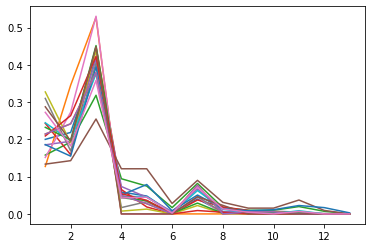

In [753]:
for i in range(len(profiles)):
    t = np.arange(1,14)
    plt.plot(t,profiles[i]/np.sum(profiles[i]))

In [647]:
#random non symmetric with n, p
def random_adj_matrix(N,p):
    A = np.zeros((N,N), dtype=int)
    for i in range(N):
        for j in range(N):
            if rn.random() < p and i!=j:
                A[i][j] = 1
    return A

In [648]:
p = np.sum(A)/(n**2-n)
p

0.09064327485380116

In [649]:
R = np.zeros((10,13))
for i in range(10):
    B = random_adj_matrix(n,p)
    R[i]=triad_census(B)
R

array([[31., 22., 60.,  0.,  0.,  0.,  6.,  3.,  0.,  0.,  0.,  0.,  0.],
       [17., 24., 44.,  6.,  5.,  0.,  1.,  4.,  0.,  0.,  0.,  0.,  0.],
       [25., 32., 59.,  5.,  5.,  0.,  3.,  4.,  0.,  0.,  1.,  0.,  0.],
       [40., 39., 83.,  7.,  7.,  0., 12.,  3.,  1.,  0.,  2.,  0.,  0.],
       [21., 14., 40., 10., 15.,  1.,  4.,  1.,  0.,  1.,  1.,  0.,  0.],
       [26., 20., 31.,  1.,  5.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.],
       [12., 11., 20.,  1.,  7.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [32., 40., 57.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.],
       [43., 36., 88., 14., 13.,  1., 13.,  6.,  2.,  0.,  1.,  0.,  0.],
       [18., 11., 31.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [650]:
Rmean = np.mean(R,axis=0)

In [651]:
result = np.nan_to_num(triad_census(A)/Rmean, nan=0)
result

<ipython-input-651-1857170aae0a>:1: RuntimeWarning: invalid value encountered in true_divide
  result = np.nan_to_num(triad_census(A)/Rmean, nan=0)


array([0.98113208, 0.68273092, 0.93567251, 1.59090909, 0.35087719,
       0.        , 0.75471698, 0.95238095, 3.33333333, 0.        ,
       0.        , 0.        , 0.        ])

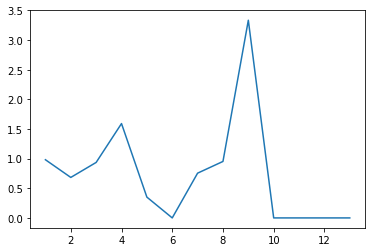

In [652]:
plt.plot(t,result)